---

## <center><font color=coal><u><big> TP 1 : Apprentissage Statistique Automatique II </big></u></font></center>


In [1]:
# delete warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.metrics import confusion_matrix, classification_report

from functools import partial
from pathlib import Path

In [4]:
# define paths
path = Path('data/fruits-360_original-size')

# define train path
train = path / 'Training'
print(f"Training Path : {train}")

# define test path
test = path / 'Test'
print(f"Test Path : {test}")

Training Path : data\fruits-360_original-size\Training
Test Path : data\fruits-360_original-size\Test


---

### <center><font color=skyblue><big> Dataset Overview </big></font></center>

Link : "https://www.kaggle.com/datasets/moltean/fruits"

The following fruits, vegetables and nuts are included :

| 1 - (A-C) | 2 - (C-L) | 3 - (L-P) | 4 - (P-Z) |
| :--- | :--- | :--- | :--- |
| 🍎 **Apples** *(Crimson Snow, Golden, Golden-Red, Granny Smith, Pink Lady, Red, Red Delicious)* | 🍊 **Clementine** | 🟢 **Lime** | 🍍 **Pineapple** *(normal, Mini)* |
| 🍑 **Apricot** | 🥥 **Cocos** | 🔴 **Lychee** | 🥜 **Pistachio** |
| 🥑 **Avocado** | 🌽 **Corn** *(with husk)* | 🍊 **Mandarine** | 🐉 **Pitahaya Red** |
| 🥑 **Avocado ripe** | 🥒 **Cucumber** *(ripened, regular)* | 🥭 **Mango** *(Green, Red)* | 🟣 **Plum** *(different varieties)* |
| 🍌 **Banana** *(Yellow, Red, Lady Finger)* | 🟤 **Dates** | 🟣 **Mangostan** | 🔴 **Pomegranate** |
| 🫘 **Beans** | 🍆 **Eggplant** | 🟡 **Maracuja** | 🍊 **Pomelo Sweetie** |
| 🟣 **Beetroot Red** | 🟣 **Fig** | 🍈 **Melon Piel de Sapo** | 🥔 **Potato** *(Red, Sweet, White)* |
| 🫐 **Blackberry** | 🫚 **Ginger Root** | 🍇 **Mulberry** | 🟡 **Quince** |
| 🫐 **Blueberry** | 🟢 **Goosberry** | 🍑 **Nectarine** *(Regular, Flat)* | 🔴 **Rambutan** |
| 🥬 **Cabbage** | 🟠 **Granadilla** | 🥜 **Nut** *(Forest, Pecan)* | 🍇 **Raspberry** |
| 🌵 **Cactus fruit** | 🍇 **Grape** *(Blue, Pink, White)* | 🧅 **Onion** *(Red, White)* | 🔴 **Redcurrant** |
| 🌰 **Caju seed** | 🍊 **Grapefruit** *(Pink, White)* | 🍊 **Orange** | 🟤 **Salak** |
| 🍈 **Cantaloupe** *(2 varieties)* | 🍐 **Guava** | 🥭 **Papaya** | 🍓 **Strawberry** *(normal, Wedge)* |
| ⭐ **Carambula** | 🌰 **Hazelnut** | 🟣 **Passion fruit** | 🔴 **Tamarillo** |
| 🥕 **Carrot** | 🫐 **Huckleberry** | 🍑 **Peach** *(different varieties)* | 🍊 **Tangelo** |
| 🥦 **Cauliflower** | 🟧 **Kaki** | 🍐 **Pear** *(Abate, Forelle, Kaiser, Monster, Red, Stone, Williams)* | 🍅 **Tomato** *(Maroon, Cherry Red, Yellow, not ripened, Heart)* |
| 🍏 **Cherimoya** | 🥝 **Kiwi** | 🟡 **Pepino** | 🌰 **Walnut** |
| 🍒 **Cherry** *(different varieties, Rainier)* | 🥬 **Kohlrabi** | 🫑 **Pepper** *(Red, Green, Orange, Yellow)* | 🍉 **Watermelon** |
| 🍒 **Cherry Wax** *(Yellow, Red, Black)* | 🍊 **Kumsquats** | 🟠 **Physalis** *(normal, with Husk)* | 🥒 **Zucchini** *(green and dark)* |
| 🌰 **Chestnut** | 🍋 **Lemon** *(normal, Meyer)* | | |

---

In [5]:
# --- Parameters ---
EPOCHS = 5
LR = 0.001
BATCH_SIZE = 32
IMG_SIZE = (100, 100)

In [6]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

---

#### <font color=skyblue><u><big> 1 : </big></u></font>

In [7]:
# number of images per class
class_counts = {}
for item in train.iterdir():
    if item.is_dir():
        class_counts[item.name] = len(list(item.glob('*.jpg')))

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'data\\fruits-360_original-size\\Training'

In [8]:
# creating a dataset 
df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

print(f"Min images per class: {df['Count'].min()}")
print(f"Max images per class: {df['Count'].max()}")
print(f"Mean images per class: {df['Count'].mean():.2f}")

Min images per class: nan
Max images per class: nan
Mean images per class: nan


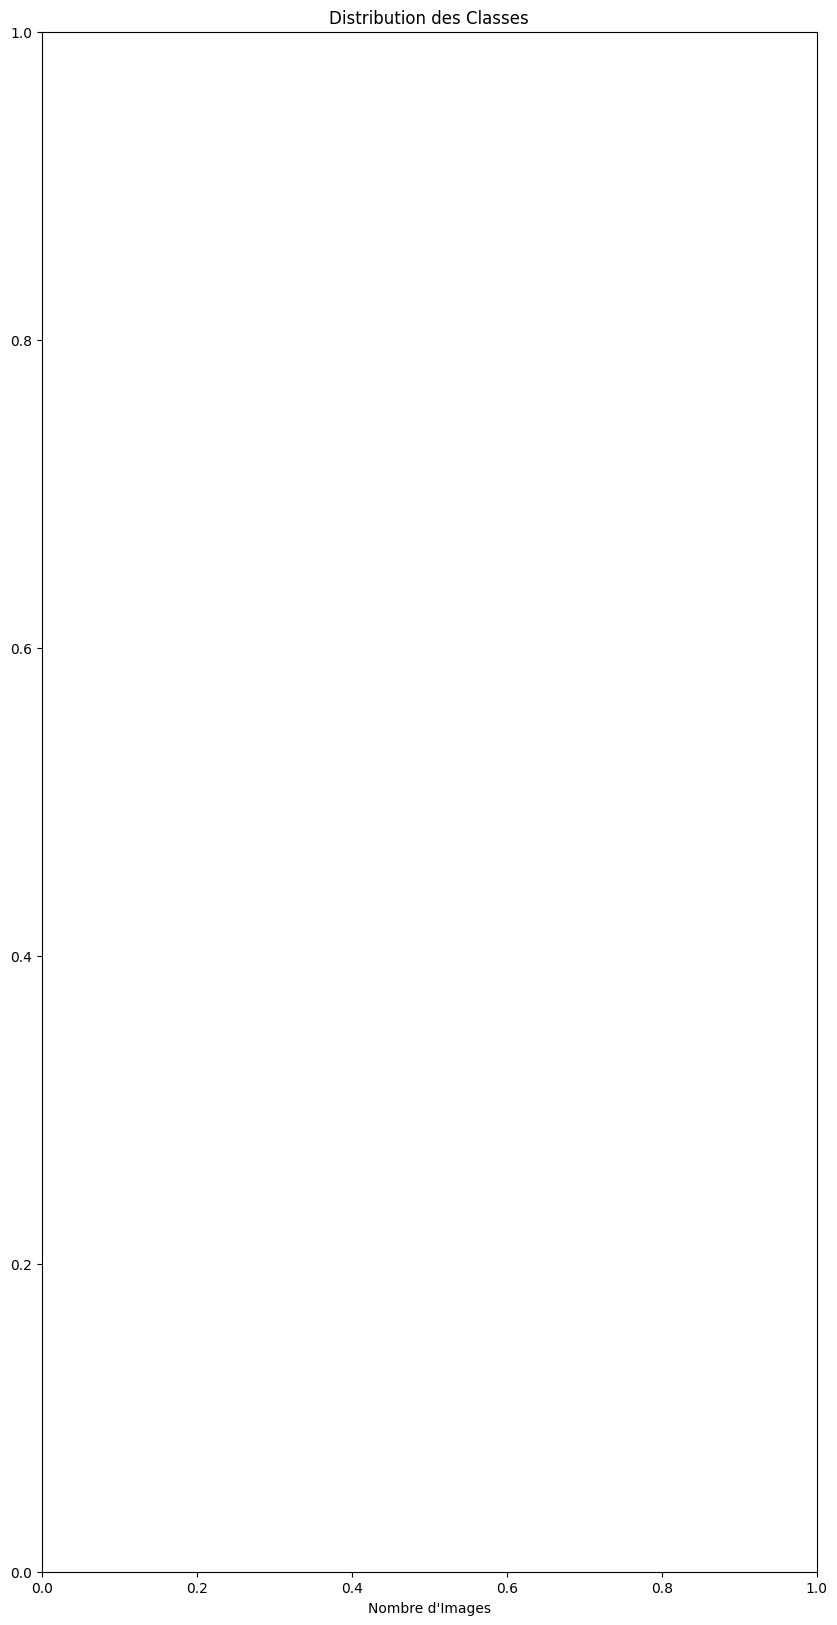

In [9]:
# distribution of classes
plt.figure(figsize=(10, 20)) 
sns.barplot(y='Class', x='Count', data=df, palette="hsv")
plt.title("Distribution des Classes")
plt.xlabel("Nombre d'Images")
plt.ylabel("")
plt.show()

---

#### <font color=skyblue><u><big> 2 : </big></u></font>

In [ ]:
print(" Starting dataset creation... \n")

# Training Dataset
print("--- Training Dataset ---")
train_ds = tf.keras.utils.image_dataset_from_directory(
    train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)
print("\n")


# Validation Dataset
print("--- Validation Dataset ---")
val_ds = tf.keras.utils.image_dataset_from_directory(
    train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)
print("\n")


# Test Dataset
print("--- Test Dataset ---")
test_ds = tf.keras.utils.image_dataset_from_directory(
    test,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


 Starting dataset creation... 

--- Training Dataset ---
Found 38279 files belonging to 109 classes.
Using 30624 files for training.


--- Validation Dataset ---
Found 38279 files belonging to 109 classes.
Using 7655 files for validation.


--- Test Dataset ---
Found 19028 files belonging to 109 classes.


In [ ]:
# Class names and Number of classes
class_names = train_ds.class_names
print(f"Class names: {class_names}")

print("\n")

num_classes = len(class_names)
print(f"Nombre de classes : {num_classes}")

Class names: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Core 1', 'Apple Red Yellow 2', 'Apple worm 1', 'Avocado Black 1', 'Avocado Black 2', 'Avocado Green 1', 'Banana 3', 'Banana 4', 'Beans 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1', 'Blackberrie not rippen 1', 'Cabbage red 1', 'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cherimoya 1', 'Cherry 3', 'Cherry 4', 'Cherry 5', 'Cherry Rainier 2', 'Cherry Rainier 3', 'Cherry Sour 1', 'Cherry Wax Red 2', 'Cherry Wax Red 3', 'Cherry Wax not ripen 1', 'Cherry Wax not ripen 2', 'Cucumber 1', 'Cucumber 10', 'Cucumber 11', 'Cucumber 3', 'Cucumber 4', 'Cucumber 5', 'Cucumber 7', 'Cucumber 8', 'Cucumber 9', 'Gooseberry 1', 'Nectarine Flat 2', 'Nut 1', 'Nut 2', 'Nut 3', 'Nut 4', 'Nut 5', 'Onion 2', 'Onion Red 2', 'Onion White Peeled 1', 'Peach 3', 'Peach 4', 'Peach 5', 'Peach 6', 'Pear 1', 'Pear 10', 'Pear 1

In [ ]:
# ------------------------------------------------------------------------------
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
# ------------------------------------------------------------------------------

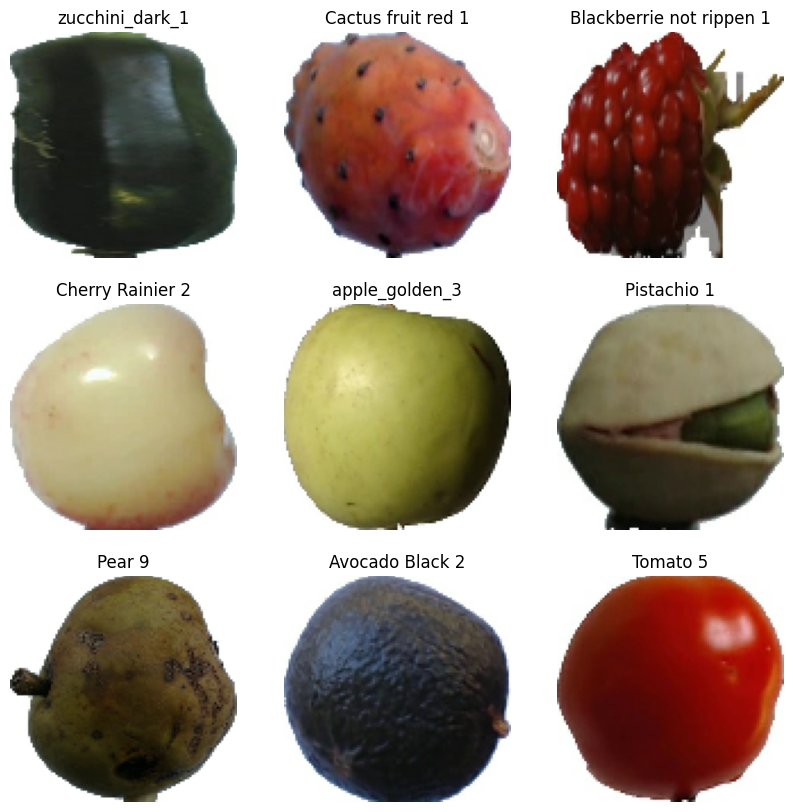

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

---

#### <font color=skyblue><u><big> 3 : </big></u></font>

In [ ]:
DefaultConv2D = partial(
    layers.Conv2D, 
    kernel_size=3, 
    padding="same", 
    activation="relu"
)

In [ ]:
# Model Creation 

model1 = models.Sequential([
    layers.Input(shape=IMG_SIZE + (3,)),
    layers.Rescaling(1./255),
    
    # CNN
    DefaultConv2D(filters=32),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    DefaultConv2D(filters=64),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=num_classes, activation="softmax")
])

model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 109)            │        28,013 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,840,109 (18.46 MB)

 Trainable params: 4,840,109 (18.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- Training the model ---
print(f"Starting training for {EPOCHS} epochs...")
history1 = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Starting training for 5 epochs...
Epoch 1/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 160s 166ms/step - accuracy: 0.7651 - loss: 0.8953 - val_accuracy: 0.9540 - val_loss: 0.1327
Epoch 2/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 158s 165ms/step - accuracy: 0.9740 - loss: 0.0863 - val_accuracy: 0.9821 - val_loss: 0.0539
Epoch 3/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 154s 161ms/step - accuracy: 0.9781 - loss: 0.0679 - val_accuracy: 0.9929 - val_loss: 0.0252
Epoch 4/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 156s 163ms/step - accuracy: 0.9854 - loss: 0.0480 - val_accuracy: 0.9903 - val_loss: 0.0287
Epoch 5/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 155s 162ms/step - accuracy: 0.9912 - loss: 0.0318 - val_accuracy: 0.9956 - val_loss: 0.0134


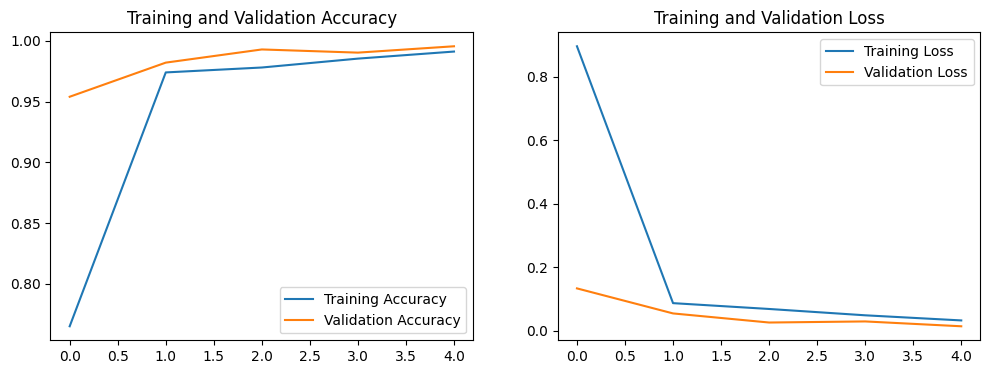

In [ ]:
plot_history(history1)

**Observation :**
* On observe une accuracy de 99% ce qui montre un léger overfitting.
* Pour le modèle 1, un EPOCHS = 2 suffit pour avoir une bonne précision (97%).

---

#### <font color=skyblue><u><big> 4 & 5: </big></u></font>

In [ ]:
# --- Transfer Learning with MobileNetV2 --- 
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

In [ ]:
# remove the # to display the model summary
# base_model.summary()

In [ ]:
# Model creation

model2 = tf.keras.Sequential([
    layers.Input(shape=IMG_SIZE + (3,)),
    layers.Rescaling(1./127.5, offset=-1),
    base_model, 
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 109)            │       139,629 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,397,613 (9.15 MB)

 Trainable params: 139,629 (545.43 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# --- Training the model ---
print(f"Starting training for {EPOCHS} epochs...")
history2 = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Starting training for 5 epochs...
Epoch 1/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 114s 114ms/step - accuracy: 0.4194 - loss: 2.4453 - val_accuracy: 0.8784 - val_loss: 0.6310
Epoch 2/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 108s 113ms/step - accuracy: 0.8013 - loss: 0.6901 - val_accuracy: 0.9515 - val_loss: 0.2805
Epoch 3/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 109s 114ms/step - accuracy: 0.8909 - loss: 0.3854 - val_accuracy: 0.9769 - val_loss: 0.1620
Epoch 4/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 110s 115ms/step - accuracy: 0.9330 - loss: 0.2478 - val_accuracy: 0.9875 - val_loss: 0.1069
Epoch 5/5
957/957 ━━━━━━━━━━━━━━━━━━━━ 110s 115ms/step - accuracy: 0.9575 - loss: 0.1714 - val_accuracy: 0.9931 - val_loss: 0.0749


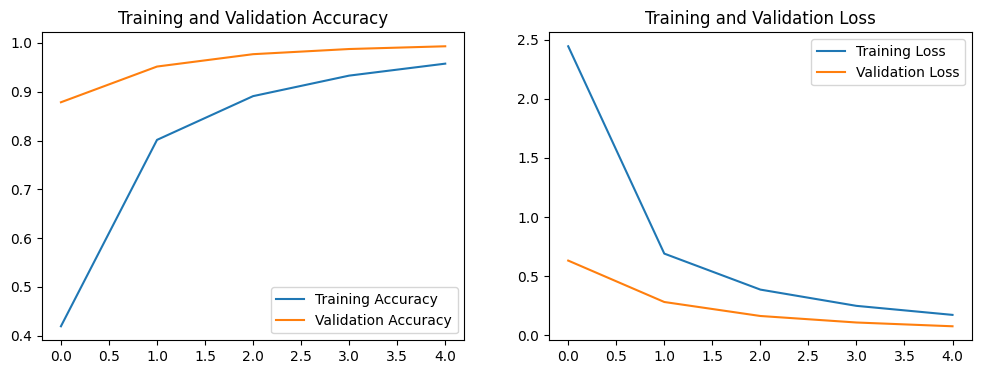

In [ ]:
plot_history(history2)

**Observation :**
* La convergence est atteint un niveau de précision proche de 95%.
* L'écart entre `train` et `val` est généralement plus faible, ce qui indique une meilleure robustesse.

In [ ]:
# starting Fine-Tuning
base_model.trainable = True

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 109)            │       139,629 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,397,613 (9.15 MB)

 Trainable params: 2,363,501 (9.02 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
# --- Training the model ---
more = 3
EPOCHS2 = EPOCHS + more

history3 = model2.fit(
    train_ds,
    validation_data=val_ds,
    initial_epoch=history2.epoch[-1],
    epochs=EPOCHS2
)

Epoch 5/8
957/957 ━━━━━━━━━━━━━━━━━━━━ 444s 438ms/step - accuracy: 0.6529 - loss: 1.4963 - val_accuracy: 0.9340 - val_loss: 0.2314
Epoch 6/8
957/957 ━━━━━━━━━━━━━━━━━━━━ 453s 473ms/step - accuracy: 0.9452 - loss: 0.2856 - val_accuracy: 0.9869 - val_loss: 0.0749
Epoch 7/8
957/957 ━━━━━━━━━━━━━━━━━━━━ 459s 479ms/step - accuracy: 0.9828 - loss: 0.1173 - val_accuracy: 0.9979 - val_loss: 0.0262
Epoch 8/8
957/957 ━━━━━━━━━━━━━━━━━━━━ 643s 673ms/step - accuracy: 0.9942 - loss: 0.0593 - val_accuracy: 0.9997 - val_loss: 0.0118


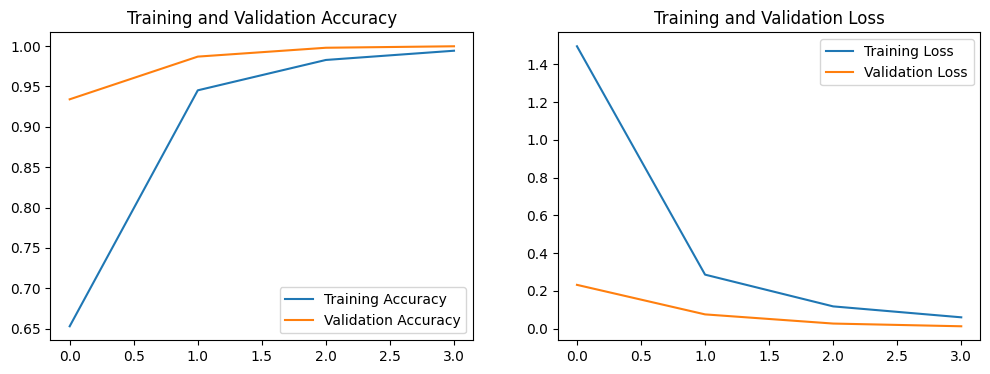

In [ ]:
plot_history(history3)

**Synthèse :**
* Le modèle optimisé montre la courbe la plus stable.

In [ ]:
# ------------------------------------------------------------------------------
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model2.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)
# ------------------------------------------------------------------------------

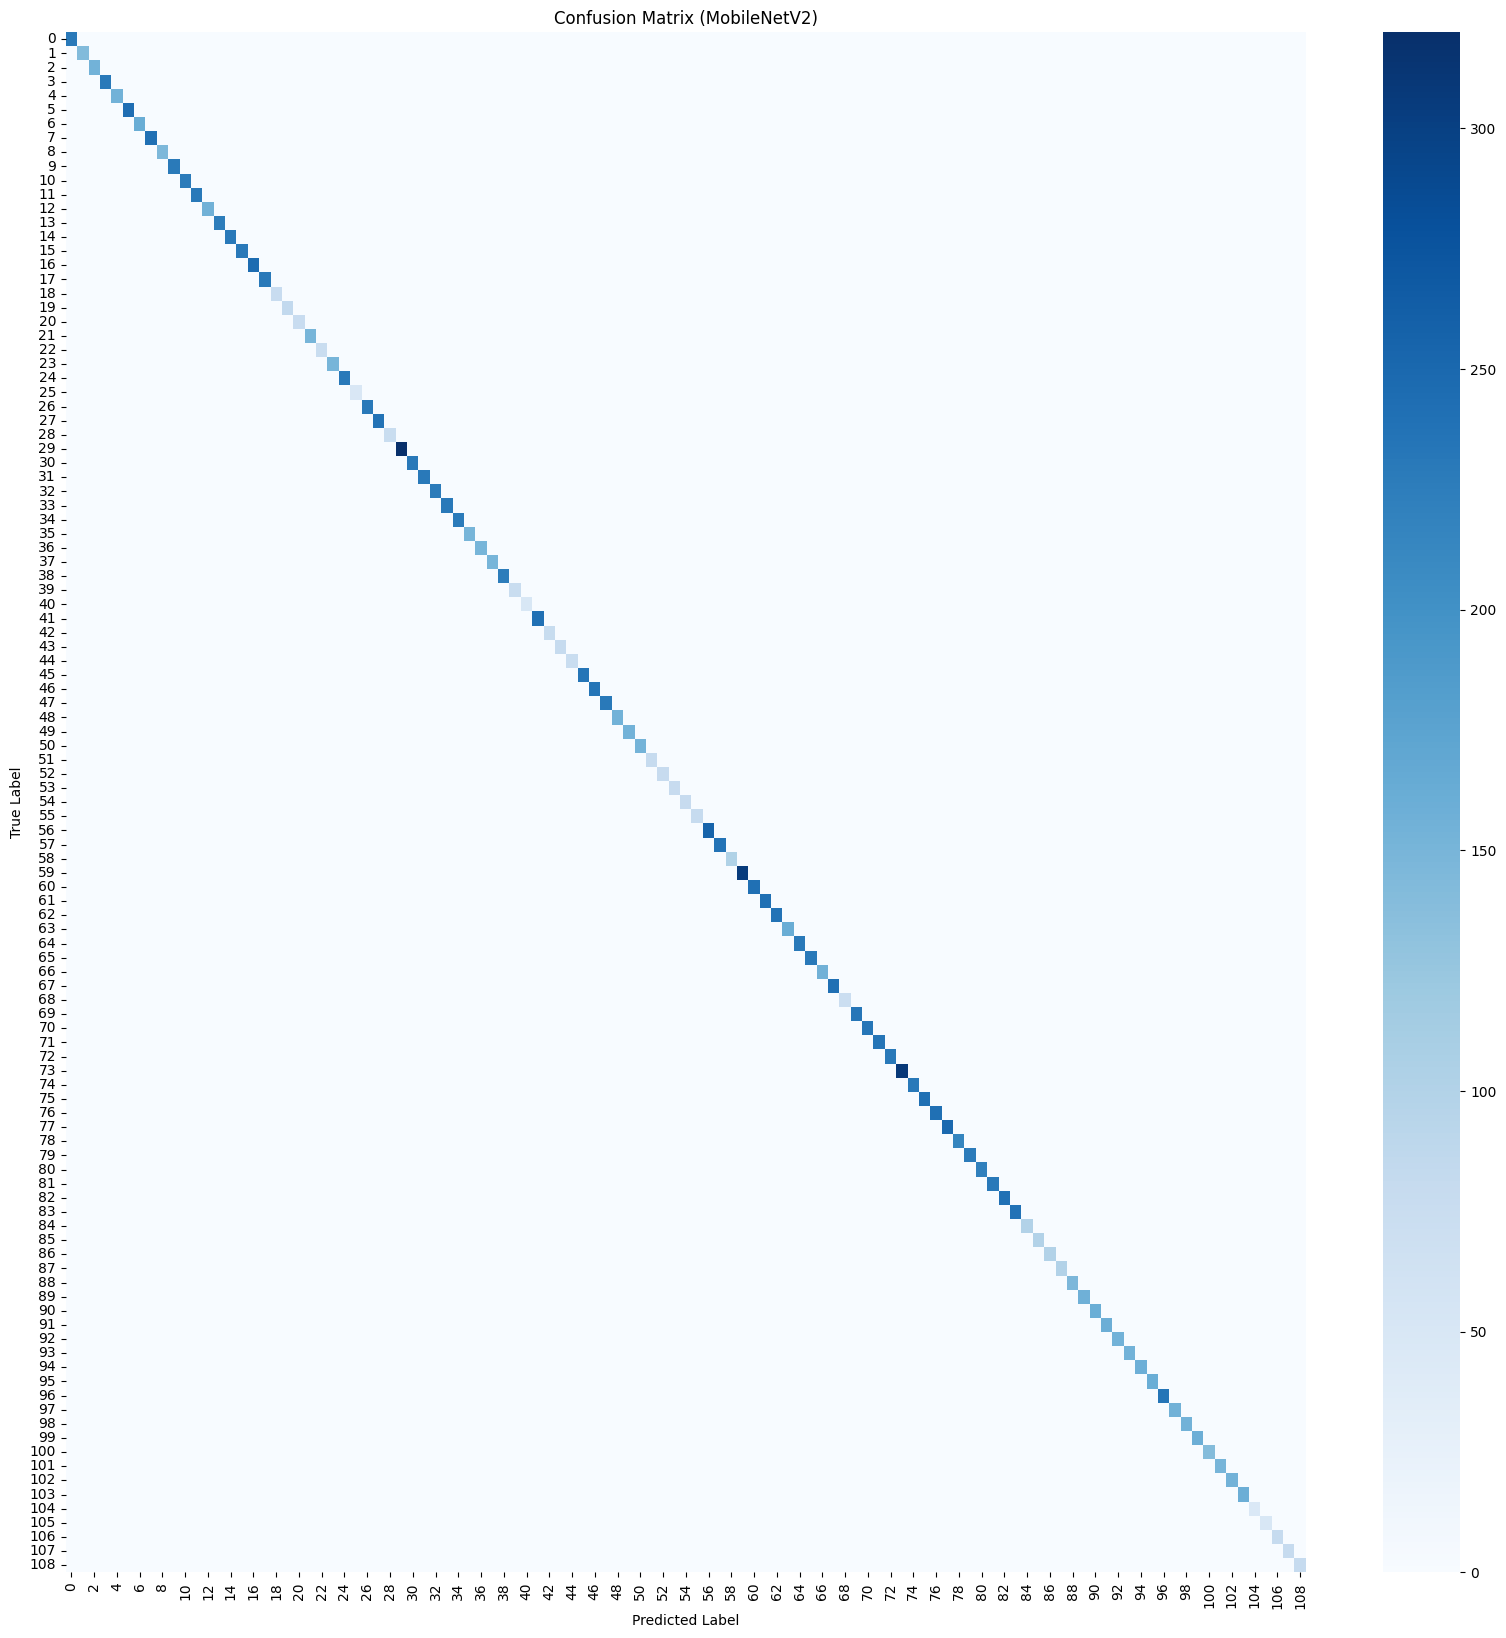

In [ ]:
# confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MobileNetV2)')
plt.show()

* La matrice présente une diagonale dominante très nette. Cela signifie que pour la grande majorité des classes, la prédiction est la bonne.
* On observe très peu de faux positifs et faux négatifs.

In [ ]:
# classification report
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=class_names))


--- Classification Report ---
                           precision    recall  f1-score   support

                 Apple 10       1.00      1.00      1.00       231
                 Apple 11       1.00      1.00      1.00       142
                 Apple 12       1.00      1.00      1.00       154
                 Apple 13       1.00      1.00      1.00       231
                 Apple 14       1.00      1.00      1.00       154
                 Apple 17       1.00      1.00      1.00       243
                 Apple 18       1.00      1.00      1.00       162
                 Apple 19       1.00      1.00      1.00       241
                  Apple 5       1.00      1.00      1.00       146
                  Apple 7       1.00      1.00      1.00       229
                  Apple 8       1.00      1.00      1.00       228
                  Apple 9       1.00      1.00      1.00       231
             Apple Core 1       1.00      1.00      1.00       156
       Apple Red Yellow 2     

In [ ]:
# Code pour identifier les erreurs précises
errors = []
for i in range(len(y_true)):
    if y_true[i] != y_pred[i]:
        # On stocke l'index, le vrai nom, et le nom prédit
        errors.append((i, class_names[y_true[i]], class_names[y_pred[i]]))

print(f"Nombre total d'erreurs sur {len(y_true)} images de test : {len(errors)}")
print("\n--- Détail des confusions ---")
for idx, true_label, pred_label in errors:
    print(f"Image {idx}: Vrai = {true_label}  <--->  Prédit = {pred_label}")

Nombre total d'erreurs sur 19028 images de test : 3

--- Détail des confusions ---
Image 8011: Vrai = Quince 3  <--->  Prédit = Quince 4
Image 12394: Vrai = Pear 7  <--->  Prédit = Pear 9
Image 18760: Vrai = Tomato 9  <--->  Prédit = Tomato 8


Comme écrit précedemment on remarque que certaines classes sont confondus.

**Conclusion :** 
<br>
Le modèle est performant pour distinguer les catégories distinctes mais peine légèrement sur les sous-variétés, ce qui pourrait être amélioré avec plus de données d'augmentation.

---

#### <font color=skyblue><u><big> 6 : </big></u></font>

In [ ]:
# create a model to find the best lr
def create_model(lr) :
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=IMG_SIZE + (3,)),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
results = {}
for lr in [0.01, 0.001, 0.0001]:
    print(f"Testing LR: {lr}...")
    history = create_model(lr).fit(train_ds, validation_data=val_ds, epochs=2, verbose=0)
    acc = history.history['val_accuracy'][-1]
    results[lr] = acc
    print(f"-> Accuracy: {acc:.2%}")

print(f"\nMeilleur LR: {max(results, key=results.get)}")

Testing LR: 0.01...
-> Accuracy: 96.51%
Testing LR: 0.001...
-> Accuracy: 99.73%
Testing LR: 0.0001...
-> Accuracy: 98.71%

Meilleur LR: 0.001
